# Table of Contents
 <p><div class="lev1"><a href="#分類問題　ー機械学習アルゴリズムのトレーニングー-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>分類問題　ー機械学習アルゴリズムのトレーニングー</a></div><div class="lev2"><a href="#人工ニューロン　ー機械学習の前史-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>人工ニューロン　ー機械学習の前史</a></div><div class="lev2"><a href="#パーセプトロンの学習アルゴリズムを実装-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>パーセプトロンの学習アルゴリズムを実装</a></div><div class="lev2"><a href="#Irisデータセットでのパーセプトロンモデルのトレーニング-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Irisデータセットでのパーセプトロンモデルのトレーニング</a></div><div class="lev3"><a href="#Numpyのおべんきょ-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Numpyのおべんきょ</a></div><div class="lev2"><a href="#ADALINEと学習の収束-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>ADALINEと学習の収束</a></div><div class="lev2"><a href="#大規模な機械学習と確率的勾配降下法-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>大規模な機械学習と確率的勾配降下法</a></div>

# 分類問題　ー機械学習アルゴリズムのトレーニングー

## 人工ニューロン　ー機械学習の前史

activation function $\phi(z)$: unit step function, where $z:=w^T x$.

$
  \phi(z) = \begin{cases}
    1 & (z \geq \theta) \\
    -1 & (z < \theta)
  \end{cases}
$

$\theta$を左辺に移動し、$w_0 = -\theta, x_0 = 1$と定義することで、

$z = w_0z_0 + w_0z_0 + \dots + w_mx_m$


$\phi(z) = \begin{cases}
    1 & (z \geq 0) \\
    -1 & (z < 0)
  \end{cases}$

と表せる。

重みの更新式：
$\Delta w_j := w_j + \Delta w_j$, where $\Delta w_j = \eta(y^{(i)}-\hat{y}^{(i)})x_j^{(i)}$ $(0 < \eta \leq 1)$

予測結果と真の答えが異なる場合、重みを更新する。

<img  src="download.png"/, width=500>

## パーセプトロンの学習アルゴリズムを実装

In [7]:
import numpy as np
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        #初期化時でなく、メソッドを呼び出されるときに作成される属性には_をつける
        self.w_ = np.zeros(1 + X.shape[1]) #df.shape = (行数、列数)　この場合は列数
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

zip関数: http://python.civic-apps.com/zip-enumerate/

In [5]:
#二つのリストをまとめて走査
a1 = [1,2,3]
a2 = [4,5,6]
for a,b in zip(a1,a2):
    print (a, b)

1 4
2 5
3 6


## Irisデータセットでのパーセプトロンモデルのトレーニング

In [8]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.iloc[50:53, 4]

50    Iris-versicolor
51    Iris-versicolor
52    Iris-versicolor
Name: 4, dtype: object

In [3]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
import matplotlib.pyplot as plt
import numpy as np

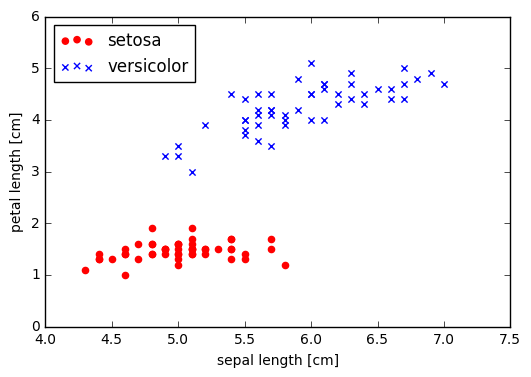

In [10]:
# 1~100行目の5列目(目的変数)を抽出
y = df.iloc[0:100,4].values

# Iris-setosaを-1に、Iris-virsicolorを1に変換
y = np.where(y == 'Iris-setosa', -1, 1)

# 1-100行目の1,3列目を抽出
X = df.iloc[0:100, [0,2]].values

# 品種setosaのプロット　赤のo
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')

# 品種versicolorのプロット　青のx
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')

# 軸ラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

# 凡例の設定　左上に
plt.legend(loc='upper left')

#図の表示
plt.show()

このデータを用いてパーセプトロンのアルゴリズムをトレーニングしてみる。

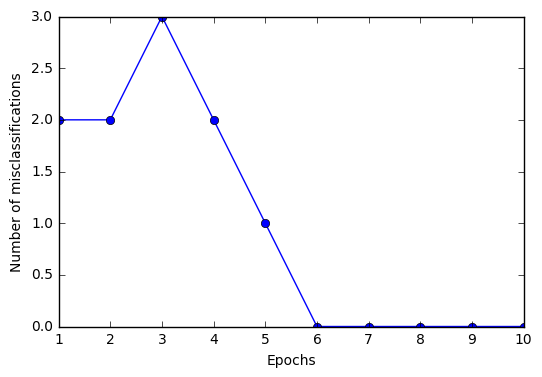

In [11]:
# パーセプトロンのオブジェクトの生成
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

#エポック（トレーニングの最大回数）と誤分類誤差の関係の折れ線
#よくわからず
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [28]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() +1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # 各特徴量を一次元配列に変換して予測を実行
    Z = classifier.predict(np.array(np.array([xx1.ravel(), xx2.ravel()]).T))
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    # alphaは透明度を表す（The alpha blending value）
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

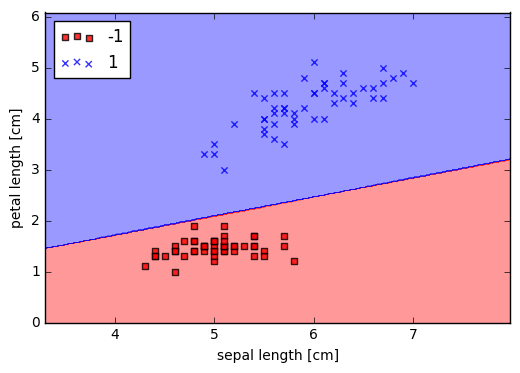

In [41]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Numpyのおべんきょ
https://hydrocul.github.io/wiki/numpy/ndarray-create-special.html

np.meshgrid:

2次元座標空間の中にある24個の点 (0.0, 0.0), (0.5, 0.0), (1.0, 0.0), (1.5. 0.0), (0.0, 0.5), (0.5, 0.5), (1.0, 0.5), (1.5. 0.5), … (0.0, 2.5), (0.5, 2.5), (1.0, 2.5), (1.5. 2.5) を、
x座標とy座標を抜き出した2つのndarrayで表す。

In [20]:
x1 = np.arange(0, 2.0, 0.5)
x1

array([ 0. ,  0.5,  1. ,  1.5])

In [21]:
x2 = np.arange(0, 3.0, 0.5)
x2

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5])

In [22]:
xx1, xx2 = np.meshgrid(x1, x2)
xx1

array([[ 0. ,  0.5,  1. ,  1.5],
       [ 0. ,  0.5,  1. ,  1.5],
       [ 0. ,  0.5,  1. ,  1.5],
       [ 0. ,  0.5,  1. ,  1.5],
       [ 0. ,  0.5,  1. ,  1.5],
       [ 0. ,  0.5,  1. ,  1.5]])

In [23]:
xx2

array([[ 0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ],
       [ 1.5,  1.5,  1.5,  1.5],
       [ 2. ,  2. ,  2. ,  2. ],
       [ 2.5,  2.5,  2.5,  2.5]])

In [24]:
xx1.ravel()

array([ 0. ,  0.5,  1. ,  1.5,  0. ,  0.5,  1. ,  1.5,  0. ,  0.5,  1. ,
        1.5,  0. ,  0.5,  1. ,  1.5,  0. ,  0.5,  1. ,  1.5,  0. ,  0.5,
        1. ,  1.5])

In [29]:
np.ravel? #一次元配列に均す

In [31]:
plt.contourf?

In [32]:
np.unique?

In [33]:
np.unique([1, 1, 2, 2, 3, 3])

array([1, 2, 3])

In [34]:
enumerate?

In [39]:
for i, ch in enumerate(['a', 'b']):
    print (str(i) + ch )

0a
1b


## ADALINEと学習の収束

ADAptive LInear NEuron

パーセプトロンアルゴリズムの改良。重みの更新に連続値を使用。(cf: パーセプトロン)

重みの最小化に用いるコスト関数$J$は、残差平方和を用いている。$$J(w):=\frac{1}{2}\sum_i(y^{(i)} - w^Tx)^2$$

連続値コスト関数$J$は、微分可能かつ凸関数。勾配降下法を用いてコスト関数を最小化する重みを見つける。

更新式：
$\Delta w = -\eta \nabla J(w)$　i.e.　$\Delta w_j = \eta \sum_i(y^{(i)} - w^Tx)x_j^{(i)}$

In [12]:
import numpy as np
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1]) #df.shape = (行数、列数)　この場合は列数
        self.cost_ = []

        for _ in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = (errors**2).sum() / 2.0
            
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

学習率$\eta$を見つけるために、実験してみる。

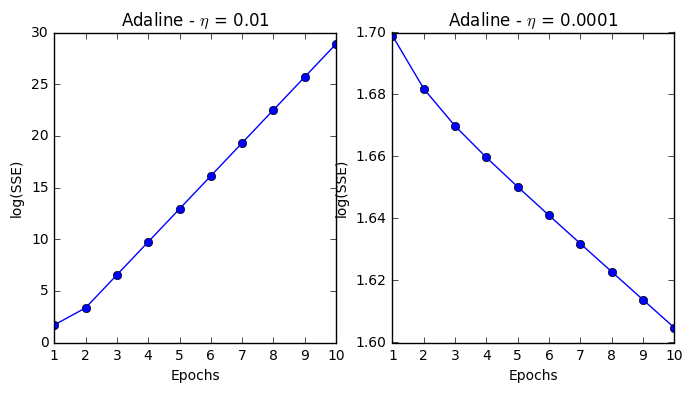

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ada1 = AdalineGD(eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(SSE)')
ax[0].set_title('Adaline - $\eta$ = 0.01')

ada2 = AdalineGD(eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(SSE)')
ax[1].set_title('Adaline - $\eta$ = 0.0001')

plt.show()

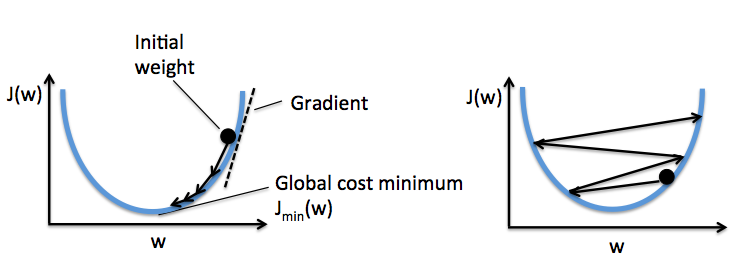

In [25]:
from IPython.display import Image
Image(filename='./python-machine-learning-book/code/ch02/images/02_12.png', width=700)

特徴量をスケーリングすることが、機械学習の様々なアルゴリズムで必要になる。

標準化＝平均0分散1にスケーリングすること

$$x_j' = \frac{x_j - \mu_j}{\sigma_j}$$

In [30]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

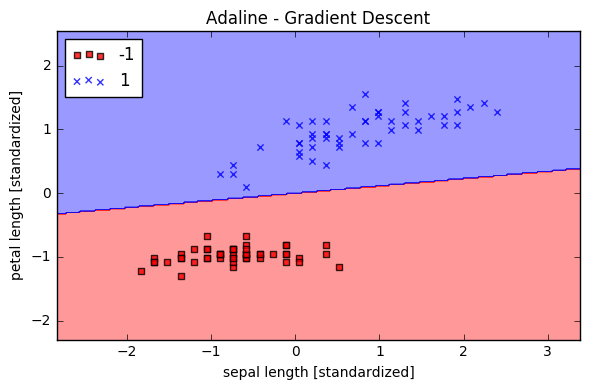

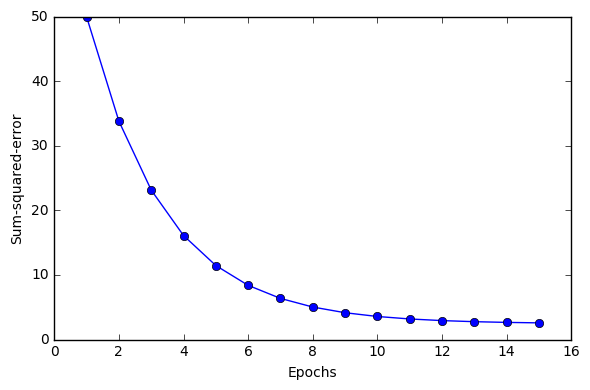

In [32]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

## 大規模な機械学習と確率的勾配降下法

In [40]:
import numpy as np
from numpy.random import seed

class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)

    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []

        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X,y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in Zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.w_ = np.zeros(1+m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [41]:
np.random.permutation(10)

array([0, 7, 1, 3, 8, 2, 9, 5, 4, 6])

In [34]:
X[[1,2,3]]

array([[ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5]])

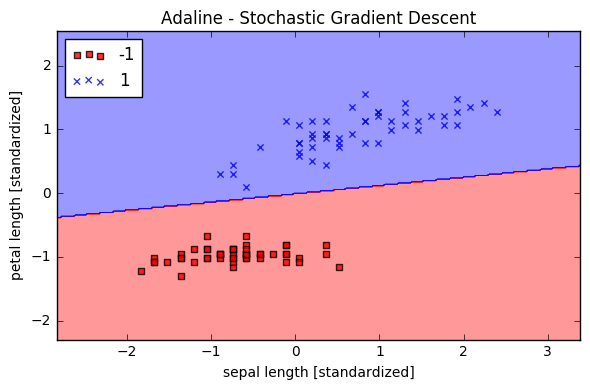

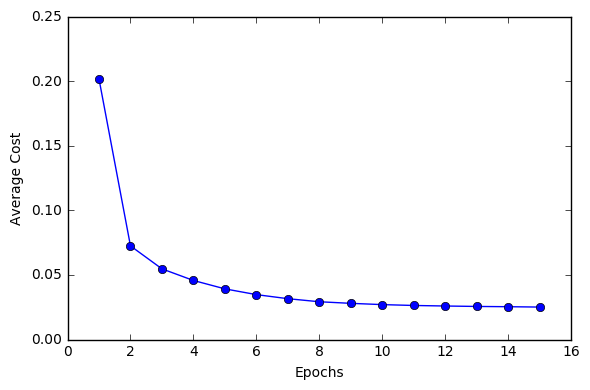

In [42]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./adaline_4.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('./adaline_5.png', dpi=300)
plt.show()